목표: **학생 성적(G3)에 영향을 주는 요인을 파악**

데이터 출처 : https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=Student+Performance

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # font 설정
import seaborn as sns


######## 한글 폰트 사용을 위한 설정 ######## 
font_path = "C:/Windows/Fonts/gulim.ttc"  # 사용할 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12) # 폰트 속성 객체 생성
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호
plt.rcParams['font.family'] = font_prop.get_name()  # matplotlib 전역 폰트 설정 

## 🔍 컬럼별 상세 번역

| 순번 | 영문 컬럼명 | 한국어 번역 | 데이터 타입 | 상세 설명 |
| --- | --- | --- | --- | --- |
| 1 | school | 학교 | 범주형 | 학생이 다니는 학교 (GP: Gabriel Pereira, MS: Mousinho da Silveira) |
| 2 | sex | 성별 | 이진 | 학생의 성별 (F: 여성, M: 남성) |
| 3 | age | 나이 | 수치형 | 학생의 나이 (15-22세) |
| 4 | address | 거주지역 | 이진 | 집 주소 유형 (U: 도시, R: 시골) |
| 5 | famsize | 가족규모 | 이진 | 가족 크기 (LE3: 3명 이하, GT3: 3명 초과) |
| 6 | Pstatus | 부모동거상태 | 이진 | 부모의 동거 상태 (T: 함께 거주, A: 별거) |
| 7 | Medu | 어머니교육수준 | 수치형 | 어머니 교육 (0: 무교육, 1: 초등교육, 2: 5-9학년, 3: 중등교육, 4: 고등교육) |
| 8 | Fedu | 아버지교육수준 | 수치형 | 아버지 교육 (0: 무교육, 1: 초등교육, 2: 5-9학년, 3: 중등교육, 4: 고등교육) |
| 9 | Mjob | 어머니직업 | 범주형 | 어머니 직업 (teacher: 교사, health: 보건, services: 공무원, at_home: 전업주부, other: 기타) |
| 10 | Fjob | 아버지직업 | 범주형 | 아버지 직업 (teacher: 교사, health: 보건, services: 공무원, at_home: 전업주부, other: 기타) |
| 11 | reason | 학교선택이유 | 범주형 | 학교 선택 이유 (home: 집과 가까움, reputation: 명성, course: 과정, other: 기타) |
| 12 | guardian | 보호자 | 범주형 | 학생의 보호자 (mother: 어머니, father: 아버지, other: 기타) |
| 13 | traveltime | 통학시간 | 수치형 | 집에서 학교까지 시간 (1: 15분 미만, 2: 15-30분, 3: 30분-1시간, 4: 1시간 초과) |
| 14 | studytime | 주간공부시간 | 수치형 | 주당 공부 시간 (1: 2시간 미만, 2: 2-5시간, 3: 5-10시간, 4: 10시간 초과) |
| 15 | failures | 과거낙제횟수 | 수치형 | 이전 과락 횟수 (1-3회, 4: 3회 이상) |
| 16 | schoolsup | 학교추가지원 | 이진 | 추가 교육 지원 (yes: 있음, no: 없음) |
| 17 | famsup | 가족학습지원 | 이진 | 가족의 교육 지원 (yes: 있음, no: 없음) |
| 18 | paid | 유료수업 | 이진 | 해당 과목 유료 수업 (yes: 수강, no: 미수강) |
| 19 | activities | 과외활동 | 이진 | 교과외 활동 참여 (yes: 참여, no: 미참여) |
| 20 | nursery | 유치원경험 | 이진 | 유치원 다닌 경험 (yes: 있음, no: 없음) |
| 21 | higher | 고등교육희망 | 이진 | 고등교육 진학 희망 (yes: 희망, no: 미희망) |
| 22 | internet | 인터넷접근 | 이진 | 집에서 인터넷 접근 (yes: 가능, no: 불가능) |
| 23 | romantic | 연인관계 | 이진 | 연애 관계 여부 (yes: 있음, no: 없음) |
| 24 | famrel | 가족관계품질 | 수치형 | 가족 관계의 질 (1: 매우 나쁨 ~ 5: 매우 좋음) |
| 25 | freetime | 여가시간 | 수치형 | 방과 후 자유 시간 (1: 매우 적음 ~ 5: 매우 많음) |
| 26 | goout | 외출빈도 | 수치형 | 친구와 외출 빈도 (1: 매우 적음 ~ 5: 매우 자주) |
| 27 | Dalc | 평일음주 | 수치형 | 평일 알코올 소비 (1: 매우 적음 ~ 5: 매우 많음) |
| 28 | Walc | 주말음주 | 수치형 | 주말 알코올 소비 (1: 매우 적음 ~ 5: 매우 많음) |
| 29 | health | 건강상태 | 수치형 | 현재 건강 상태 (1: 매우 나쁨 ~ 5: 매우 좋음) |
| 30 | absences | 결석횟수 | 수치형 | 학교 결석 횟수 (0-93회) |
| 31 | G1 | 1차성적 | 수치형 | 1학기 성적 (0-20점) |
| 32 | G2 | 2차성적 | 수치형 | 2학기 성적 (0-20점) |
| 33 | G3 | 최종성적 | 수치형 | **최종 성적 (0-20점) - 예측 대상** |

In [37]:

# 1. 데이터 로드
student_performance = fetch_ucirepo(id=320)
X = student_performance.data.features # 특성 데이터
y = student_performance.data.targets # G1, G2, G3 정답데이터


df = pd.DataFrame(
    data=student_performance.data.features,
    columns=student_performance.data.feature_names
)
# print(df.head())
# print(df.info()) 

for col in y.columns:
    df[col] = y[col]

print(df)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [38]:
# 성적 구간별 분류 생성
df['performance_level'] = pd.cut(
            df['G3'],
            bins=[0, 10, 14, 16, 20],
            labels=['저성취(0-9)', '하위(10-13)', '중위(14-15)', '상위(16-20)'],
            include_lowest=True
        )
# 성공/실패 이진 분류 (10점 이상을 성공으로 정의)
df['success'] = (df['G3'] >= 10).astype(int)


# 변수 그룹화
variable_groups = {
            'demographic': ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus'],
            'family_background': ['Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famrel'],
            'educational_support': ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher'],
            'academic_history': ['failures', 'G1', 'G2'],
            'study_habits': ['traveltime', 'studytime', 'absences'],
            'social_life': ['internet', 'romantic', 'freetime', 'goout', 'Dalc', 'Walc'],
            'health': ['health'],
            'school_choice': ['reason']
        }

# 기본 통계
print(f"• 전체 학생 수: {len(df):,}명")
print(f"• 최종 성적 범위: {df['G3'].min()}-{df['G3'].max()}점")
print(f"• 평균 최종 성적: {df['G3'].mean():.2f}점")

• 전체 학생 수: 649명
• 최종 성적 범위: 0-19점
• 평균 최종 성적: 11.91점


In [39]:
# 성취 수준별 분포
print(f"\n📊 성취 수준별 분포:")
performance_counts = df['performance_level'].value_counts().sort_index()
for level, count in performance_counts.items():
    percentage = count / len(df) * 100
    print(f"  • {level}: {count}명 ({percentage:.1f}%)")

# 성공률 (10점 이상)
success_rate = df['success'].mean() * 100
print(f"\n✅ 전체 성공률 (10점 이상): {success_rate:.1f}%")


📊 성취 수준별 분포:
  • 저성취(0-9): 197명 (30.4%)
  • 하위(10-13): 321명 (49.5%)
  • 중위(14-15): 85명 (13.1%)
  • 상위(16-20): 46명 (7.1%)

✅ 전체 성공률 (10점 이상): 84.6%


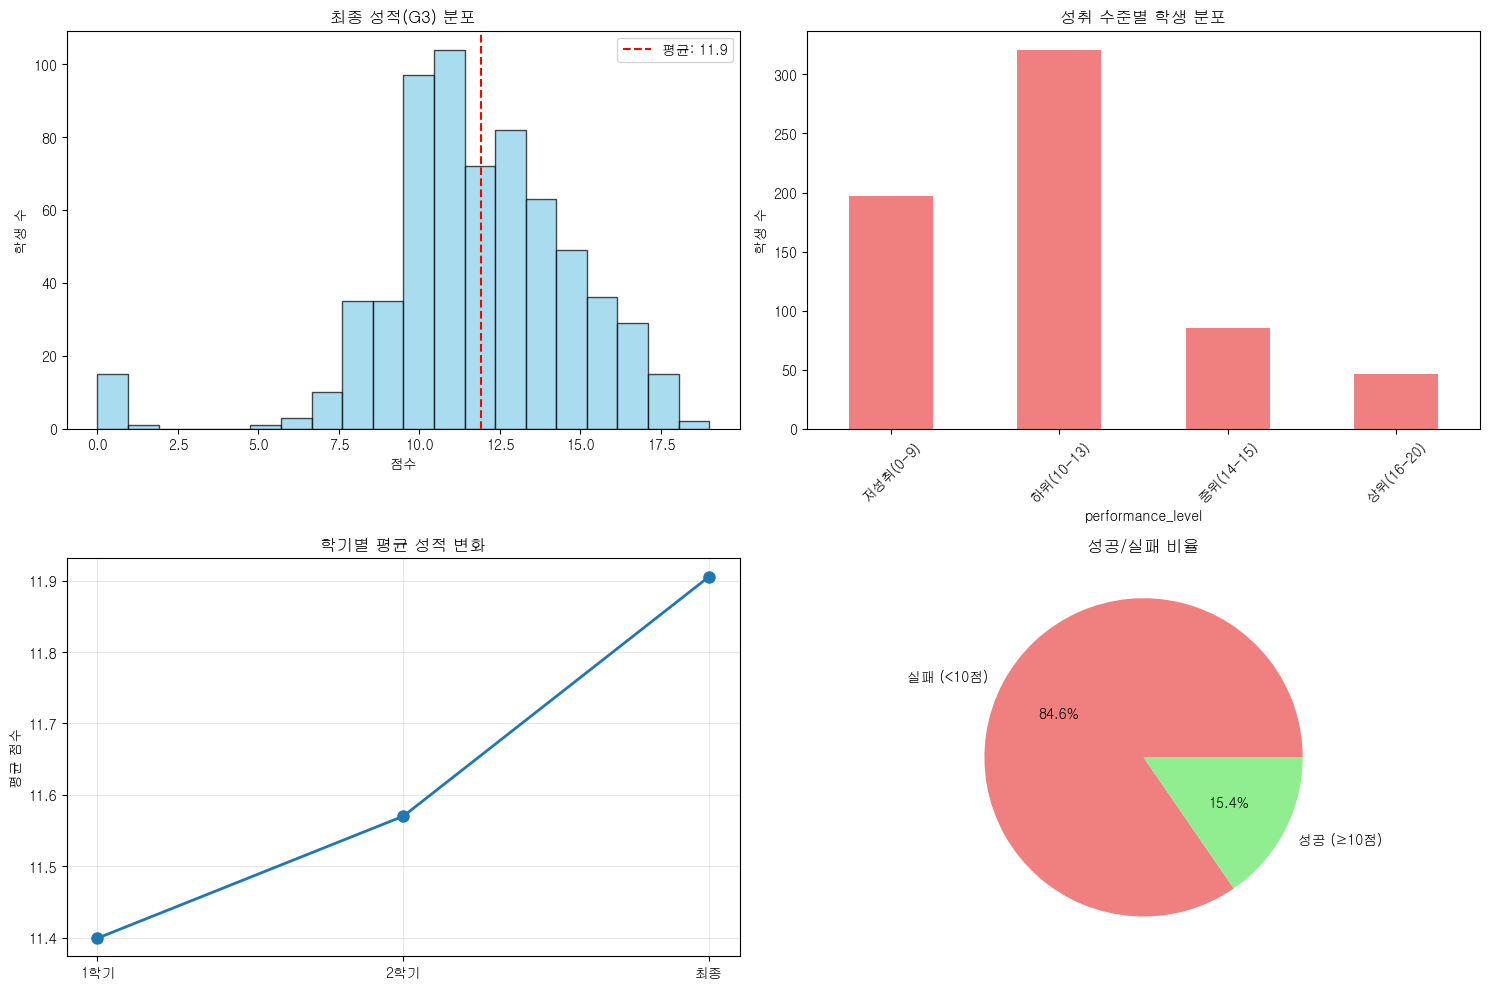

In [40]:
# 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 최종 성적 분포
axes[0,0].hist(df['G3'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['G3'].mean(), color='red', linestyle='--', label=f'평균: {df["G3"].mean():.1f}')
axes[0,0].set_title('최종 성적(G3) 분포')
axes[0,0].set_xlabel('점수')
axes[0,0].set_ylabel('학생 수')
axes[0,0].legend()

# 성취 수준별 분포
performance_counts.plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('성취 수준별 학생 분포')
axes[0,1].set_ylabel('학생 수')
axes[0,1].tick_params(axis='x', rotation=45)

# 성적 진화 (G1 -> G2 -> G3)
grade_evolution = df[['G1', 'G2', 'G3']].mean()
axes[1,0].plot(['1학기', '2학기', '최종'], grade_evolution, marker='o', linewidth=2, markersize=8)
axes[1,0].set_title('학기별 평균 성적 변화')
axes[1,0].set_ylabel('평균 점수')
axes[1,0].grid(True, alpha=0.3)

# 성공/실패 비율
success_counts = df['success'].value_counts()
axes[1,1].pie(success_counts.values, labels=['실패 (<10점)', '성공 (≥10점)'], 
                autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
axes[1,1].set_title('성공/실패 비율')

plt.tight_layout()
plt.show()


📊 school 분석:
  • 최고 성적 그룹: GP (12.58점)
  • 최저 성적 그룹: MS (10.65점)
  • 성적 차이: 1.93점
  • 통계적 유의성: 유의함 (t-test, p=0.000)

📊 sex 분석:
  • 최고 성적 그룹: F (12.25점)
  • 최저 성적 그룹: M (11.41점)
  • 성적 차이: 0.84점
  • 통계적 유의성: 유의함 (t-test, p=0.001)

📊 age 분석:
  • 최고 성적 그룹: 17 (12.27점)
  • 최저 성적 그룹: 22 (5.00점)
  • 성적 차이: 7.27점
  • 통계적 유의성: 유의함 (ANOVA, p=0.001)

📊 address 분석:
  • 최고 성적 그룹: U (12.26점)
  • 최저 성적 그룹: R (11.09점)
  • 성적 차이: 1.17점
  • 통계적 유의성: 유의함 (t-test, p=0.000)

📊 famsize 분석:
  • 최고 성적 그룹: LE3 (12.13점)
  • 최저 성적 그룹: GT3 (11.81점)
  • 성적 차이: 0.32점
  • 통계적 유의성: 유의하지 않음 (t-test, p=0.252)

📊 Pstatus 분석:
  • 최고 성적 그룹: A (11.91점)
  • 최저 성적 그룹: A (11.91점)
  • 성적 차이: 0.00점
  • 통계적 유의성: 유의하지 않음 (t-test, p=0.985)


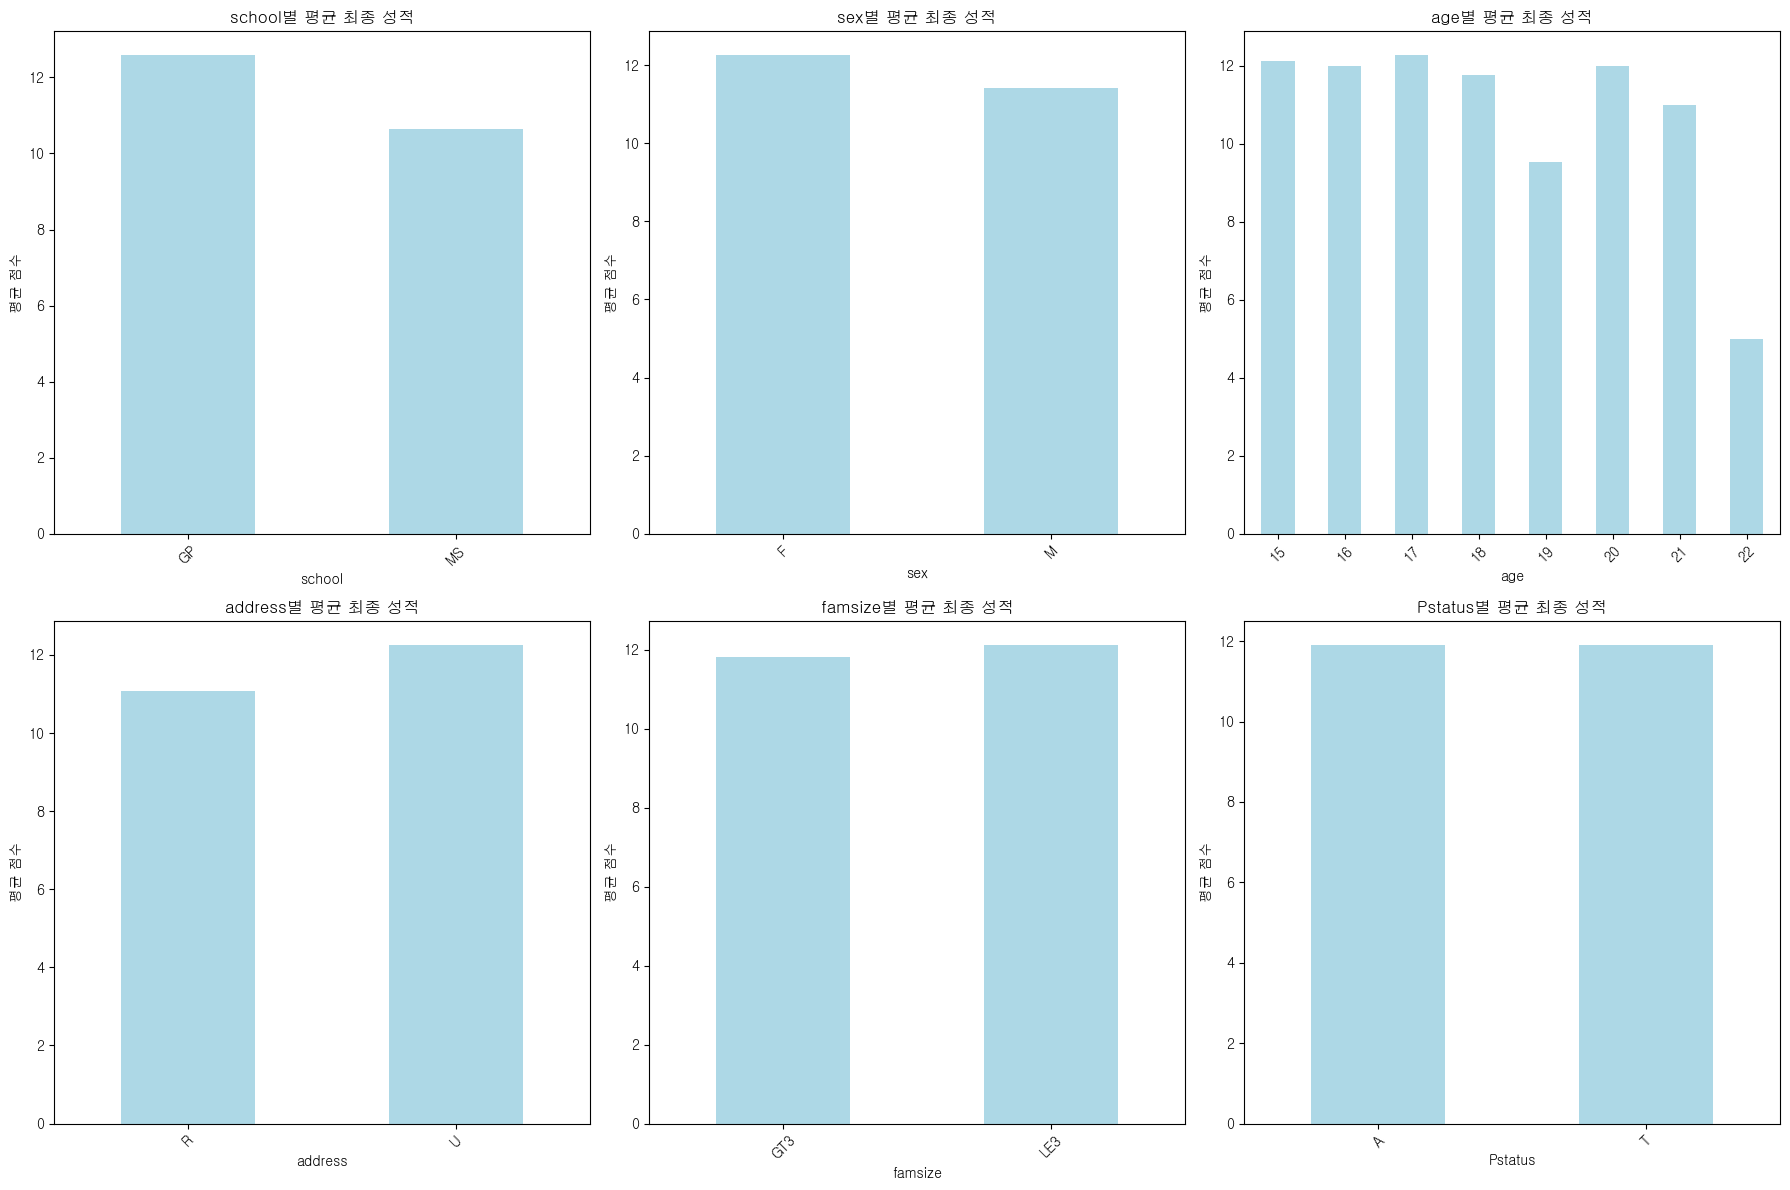


🎯 인구통계학적 요인 영향력 순위:
  1. age: 7.27점 차이 (유의함)
  2. school: 1.93점 차이 (유의함)
  3. address: 1.17점 차이 (유의함)
  4. sex: 0.84점 차이 (유의함)
  5. famsize: 0.32점 차이 (유의하지 않음)
  6. Pstatus: 0.00점 차이 (유의하지 않음)


In [42]:
# 인구통계학적 요인 영향 분석
from scipy.stats import ttest_ind, f_oneway

demographic_vars = variable_groups['demographic']
insights = []

# 각 인구통계학적 변수별 성적 차이 분석
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(demographic_vars):
    if i < len(axes):
        # 카테고리별 평균 성적 계산
        group_stats = df.groupby(var)['G3'].agg(['mean', 'count', 'std']).round(2)
        
        # 시각화
        group_stats['mean'].plot(kind='bar', ax=axes[i], color='lightblue')
        axes[i].set_title(f'{var}별 평균 최종 성적')
        axes[i].set_ylabel('평균 점수')
        axes[i].tick_params(axis='x', rotation=45)
        
        # 통계적 유의성 검증 (ANOVA 또는 t-test)
        groups = [group['G3'].values for name, group in df.groupby(var)]
        if len(groups) == 2:
            stat, p_value = ttest_ind(groups[0], groups[1])
            test_name = "t-test"
        else:
            stat, p_value = f_oneway(*groups)
            test_name = "ANOVA"
        
        # 결과 해석
        max_group = group_stats['mean'].idxmax()
        min_group = group_stats['mean'].idxmin()
        difference = group_stats['mean'].max() - group_stats['mean'].min()
        
        significance = "유의함" if p_value < 0.05 else "유의하지 않음"
        
        insight = {
            'variable': var,
            'difference': difference,
            'best_group': max_group,
            'worst_group': min_group,
            'p_value': p_value,
            'significance': significance
        }
        insights.append(insight)
        
        print(f"\n📊 {var} 분석:")
        print(f"  • 최고 성적 그룹: {max_group} ({group_stats.loc[max_group, 'mean']:.2f}점)")
        print(f"  • 최저 성적 그룹: {min_group} ({group_stats.loc[min_group, 'mean']:.2f}점)")
        print(f"  • 성적 차이: {difference:.2f}점")
        print(f"  • 통계적 유의성: {significance} ({test_name}, p={p_value:.3f})")

plt.tight_layout()
plt.show()

# 가장 영향력이 큰 인구통계학적 요인
insights.sort(key=lambda x: x['difference'], reverse=True)
print(f"\n🎯 인구통계학적 요인 영향력 순위:")
for i, insight in enumerate(insights, 1):
    print(f"  {i}. {insight['variable']}: {insight['difference']:.2f}점 차이 ({insight['significance']})")


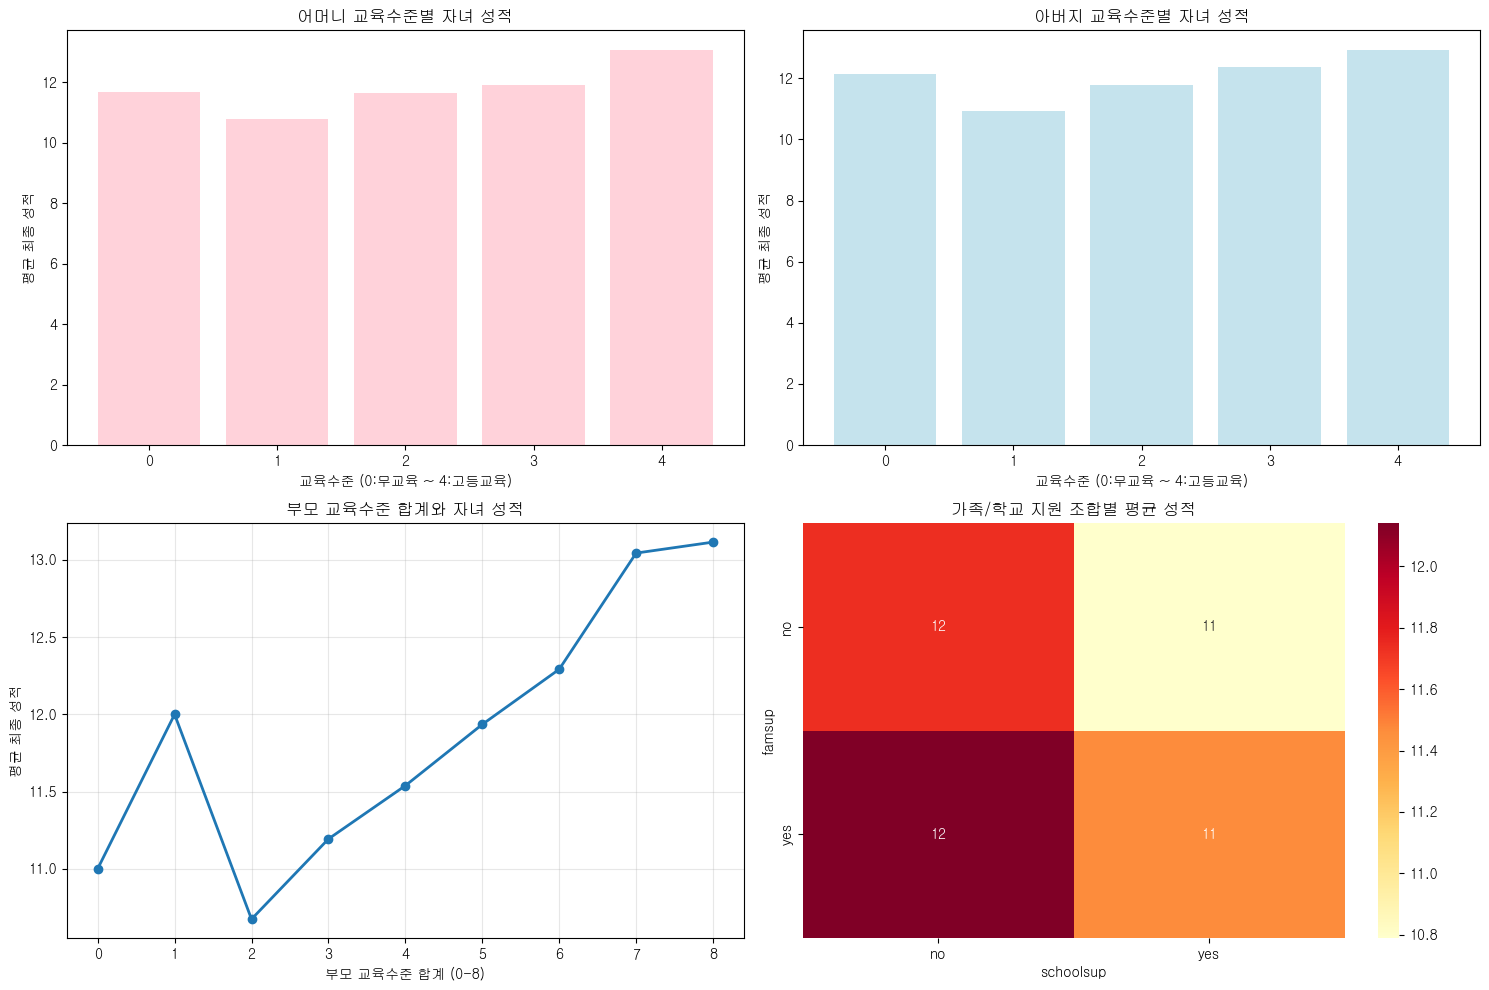


📊 가족 배경 요인과 성적 상관관계:
  • Medu: 0.240 (중간)
  • Fedu: 0.212 (중간)
  • famrel: 0.063 (약함)

💡 가족 배경 핵심 인사이트:
  • 고학력 부모(교육수준 6+ 합계) 자녀 평균: 12.80점
  • 저학력 부모(교육수준 2- 합계) 자녀 평균: 10.77점
  • 교육격차: 2.04점
  • 가족 지원 있는 경우: 12.06점
  • 가족 지원 없는 경우: 11.67점
  • 가족 지원 효과: 0.39점


In [43]:
# 가족 배경 요인 분석

# 부모 교육수준과 성적의 관계
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 어머니 교육수준별 성적
mother_edu_stats = df.groupby('Medu')['G3'].agg(['mean', 'count'])
axes[0,0].bar(mother_edu_stats.index, mother_edu_stats['mean'], color='pink', alpha=0.7)
axes[0,0].set_title('어머니 교육수준별 자녀 성적')
axes[0,0].set_xlabel('교육수준 (0:무교육 ~ 4:고등교육)')
axes[0,0].set_ylabel('평균 최종 성적')

# 아버지 교육수준별 성적
father_edu_stats = df.groupby('Fedu')['G3'].agg(['mean', 'count'])
axes[0,1].bar(father_edu_stats.index, father_edu_stats['mean'], color='lightblue', alpha=0.7)
axes[0,1].set_title('아버지 교육수준별 자녀 성적')
axes[0,1].set_xlabel('교육수준 (0:무교육 ~ 4:고등교육)')
axes[0,1].set_ylabel('평균 최종 성적')

# 부모 교육수준 조합 효과
df['parent_edu_combined'] = df['Medu'] + df['Fedu']
combined_stats = df.groupby('parent_edu_combined')['G3'].mean()
axes[1,0].plot(combined_stats.index, combined_stats.values, marker='o', linewidth=2)
axes[1,0].set_title('부모 교육수준 합계와 자녀 성적')
axes[1,0].set_xlabel('부모 교육수준 합계 (0-8)')
axes[1,0].set_ylabel('평균 최종 성적')
axes[1,0].grid(True, alpha=0.3)

# 가족 지원과 성적
support_comparison = df.groupby(['famsup', 'schoolsup'])['G3'].mean().unstack()
sns.heatmap(support_comparison, annot=True, cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('가족/학교 지원 조합별 평균 성적')

plt.tight_layout()
plt.show()

# 상관관계 분석
family_numeric = ['Medu', 'Fedu', 'famrel']
correlations = df[family_numeric + ['G3']].corr()['G3'].sort_values(ascending=False)

print(f"\n📊 가족 배경 요인과 성적 상관관계:")
for factor, corr in correlations.items():
    if factor != 'G3':
        strength = "강함" if abs(corr) > 0.3 else "중간" if abs(corr) > 0.15 else "약함"
        print(f"  • {factor}: {corr:.3f} ({strength})")

# 핵심 인사이트
print(f"\n💡 가족 배경 핵심 인사이트:")

# 부모 교육수준 효과
high_edu_parents = df[df['parent_edu_combined'] >= 6]['G3'].mean()
low_edu_parents = df[df['parent_edu_combined'] <= 2]['G3'].mean()
edu_gap = high_edu_parents - low_edu_parents

print(f"  • 고학력 부모(교육수준 6+ 합계) 자녀 평균: {high_edu_parents:.2f}점")
print(f"  • 저학력 부모(교육수준 2- 합계) 자녀 평균: {low_edu_parents:.2f}점")
print(f"  • 교육격차: {edu_gap:.2f}점")

# 가족 지원 효과
with_support = df[df['famsup'] == 'yes']['G3'].mean()
without_support = df[df['famsup'] == 'no']['G3'].mean()
support_effect = with_support - without_support

print(f"  • 가족 지원 있는 경우: {with_support:.2f}점")
print(f"  • 가족 지원 없는 경우: {without_support:.2f}점")
print(f"  • 가족 지원 효과: {support_effect:.2f}점")

C:\Users\roxie\AppData\Local\Temp\ipykernel_29472\3593636882.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,0].boxplot(study_groups, labels=[study_time_labels[i] for i in range(1, 5)])
C:\Users\roxie\AppData\Local\Temp\ipykernel_29472\3593636882.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  absence_stats = df.groupby('absence_level')['G3'].mean()


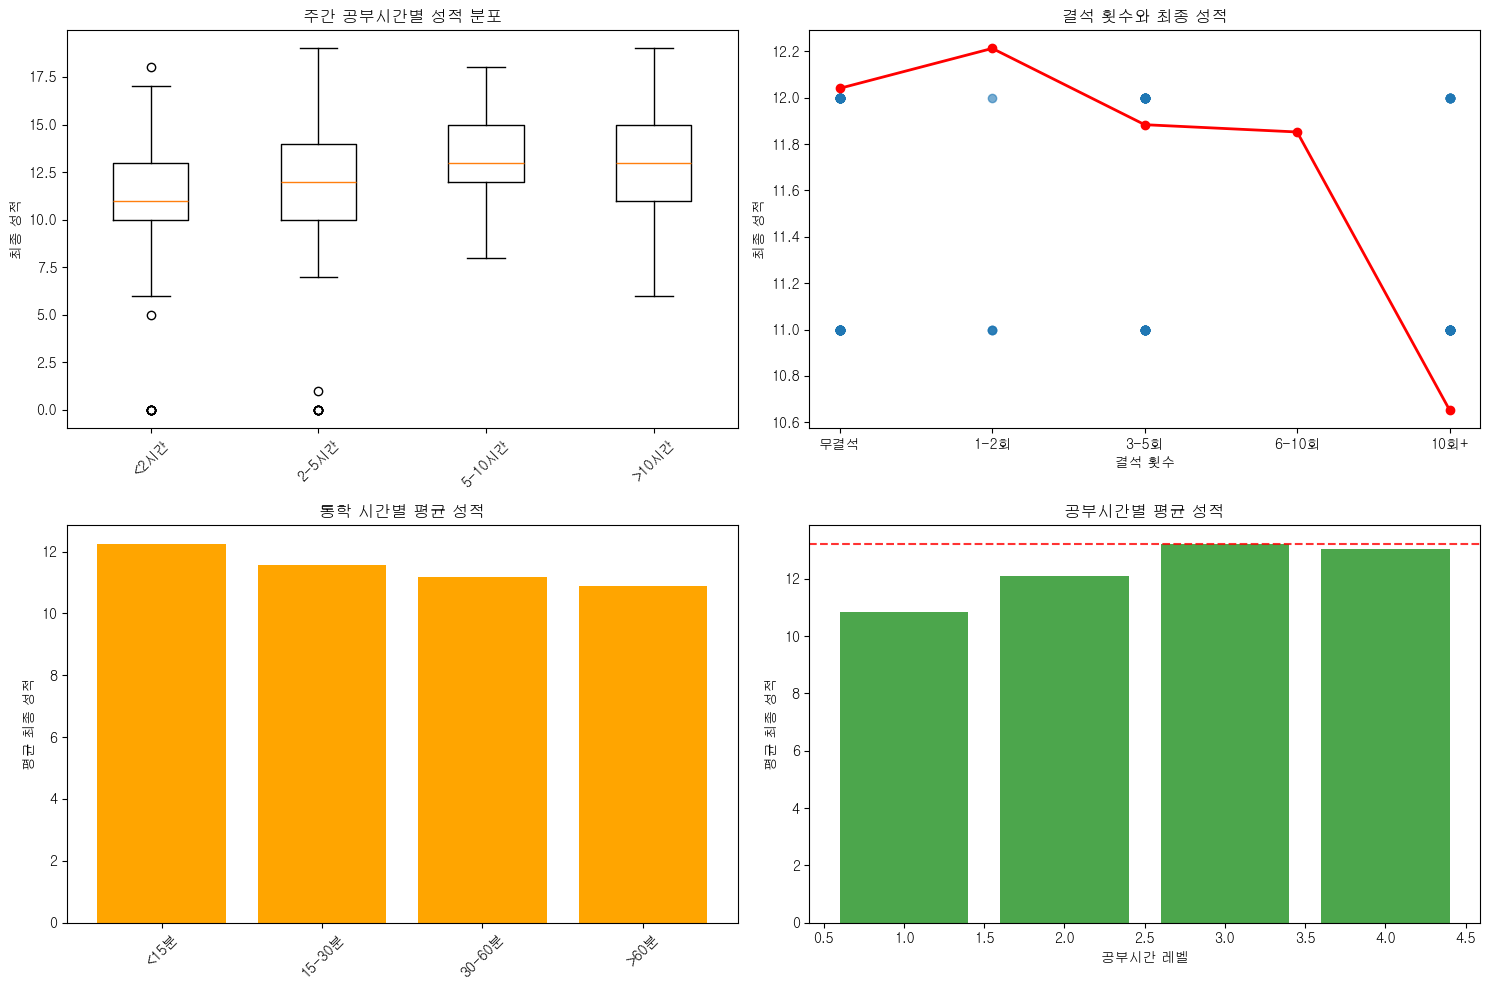


📊 학습 관련 요인과 성적 상관관계:
  • G2: 0.919 (매우 강함 정적 상관)
  • G1: 0.826 (매우 강함 정적 상관)
  • studytime: 0.250 (중간 정적 상관)
  • absences: -0.091 (약함 부적 상관)
  • traveltime: -0.127 (약함 부적 상관)
  • failures: -0.393 (강함 부적 상관)

💡 학습 습관 핵심 인사이트:
  • 최적 공부시간: 5-10시간 (평균 13.23점)
  • 무결석 평균: 12.04점 vs 다결석(10회+) 평균: 10.65점
  • 결석의 부정적 영향: -1.39점


In [44]:
# 학습 습관 요인 분석

# 학습 시간과 성적의 관계
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 주간 공부시간별 성적 분포
study_time_labels = {1: '<2시간', 2: '2-5시간', 3: '5-10시간', 4: '>10시간'}
study_groups = [df[df['studytime'] == i]['G3'] for i in range(1, 5)]

axes[0,0].boxplot(study_groups, labels=[study_time_labels[i] for i in range(1, 5)])
axes[0,0].set_title('주간 공부시간별 성적 분포')
axes[0,0].set_ylabel('최종 성적')
axes[0,0].tick_params(axis='x', rotation=45)

# 결석 횟수와 성적의 관계
axes[0,1].scatter(df['absences'], df['G3'], alpha=0.6)
axes[0,1].set_title('결석 횟수와 최종 성적')
axes[0,1].set_xlabel('결석 횟수')
axes[0,1].set_ylabel('최종 성적')

# 결석 수준별 평균 성적
df['absence_level'] = pd.cut(df['absences'], 
                                    bins=[-1, 0, 2, 5, 10, 100],
                                    labels=['무결석', '1-2회', '3-5회', '6-10회', '10회+'])
absence_stats = df.groupby('absence_level')['G3'].mean()
axes[0,1].plot(absence_stats.index, absence_stats.values, color='red', linewidth=2, marker='o')

# 통학 시간과 성적
travel_labels = {1: '<15분', 2: '15-30분', 3: '30-60분', 4: '>60분'}
travel_stats = df.groupby('traveltime')['G3'].mean()
axes[1,0].bar([travel_labels[i] for i in travel_stats.index], travel_stats.values, color='orange')
axes[1,0].set_title('통학 시간별 평균 성적')
axes[1,0].set_ylabel('평균 최종 성적')
axes[1,0].tick_params(axis='x', rotation=45)

# 학습 지원 조합 효과
support_combo = df.groupby(['schoolsup', 'paid', 'famsup']).size().reset_index(name='count')
support_combo = support_combo[support_combo['count'] >= 10]  # 최소 10명 이상인 그룹만

# 최적 학습 시간 찾기
optimal_study = df.groupby('studytime')['G3'].mean()
optimal_time = optimal_study.idxmax()
optimal_score = optimal_study.max()

axes[1,1].bar(optimal_study.index, optimal_study.values, color='green', alpha=0.7)
axes[1,1].axhline(y=optimal_score, color='red', linestyle='--', alpha=0.8)
axes[1,1].set_title('공부시간별 평균 성적')
axes[1,1].set_xlabel('공부시간 레벨')
axes[1,1].set_ylabel('평균 최종 성적')

plt.tight_layout()
plt.show()

# 학습 습관 상관관계
study_vars = ['studytime', 'absences', 'traveltime', 'failures', 'G1', 'G2']
study_correlations = df[study_vars + ['G3']].corr()['G3'].sort_values(ascending=False)

print(f"\n📊 학습 관련 요인과 성적 상관관계:")
for factor, corr in study_correlations.items():
    if factor != 'G3':
        strength = "매우 강함" if abs(corr) > 0.5 else "강함" if abs(corr) > 0.3 else "중간" if abs(corr) > 0.15 else "약함"
        direction = "정적" if corr > 0 else "부적"
        print(f"  • {factor}: {corr:.3f} ({strength} {direction} 상관)")

print(f"\n💡 학습 습관 핵심 인사이트:")
print(f"  • 최적 공부시간: {study_time_labels[optimal_time]} (평균 {optimal_score:.2f}점)")

# 결석의 영향
no_absence = df[df['absences'] == 0]['G3'].mean()
high_absence = df[df['absences'] > 10]['G3'].mean()
absence_impact = no_absence - high_absence
print(f"  • 무결석 평균: {no_absence:.2f}점 vs 다결석(10회+) 평균: {high_absence:.2f}점")
print(f"  • 결석의 부정적 영향: -{absence_impact:.2f}점")

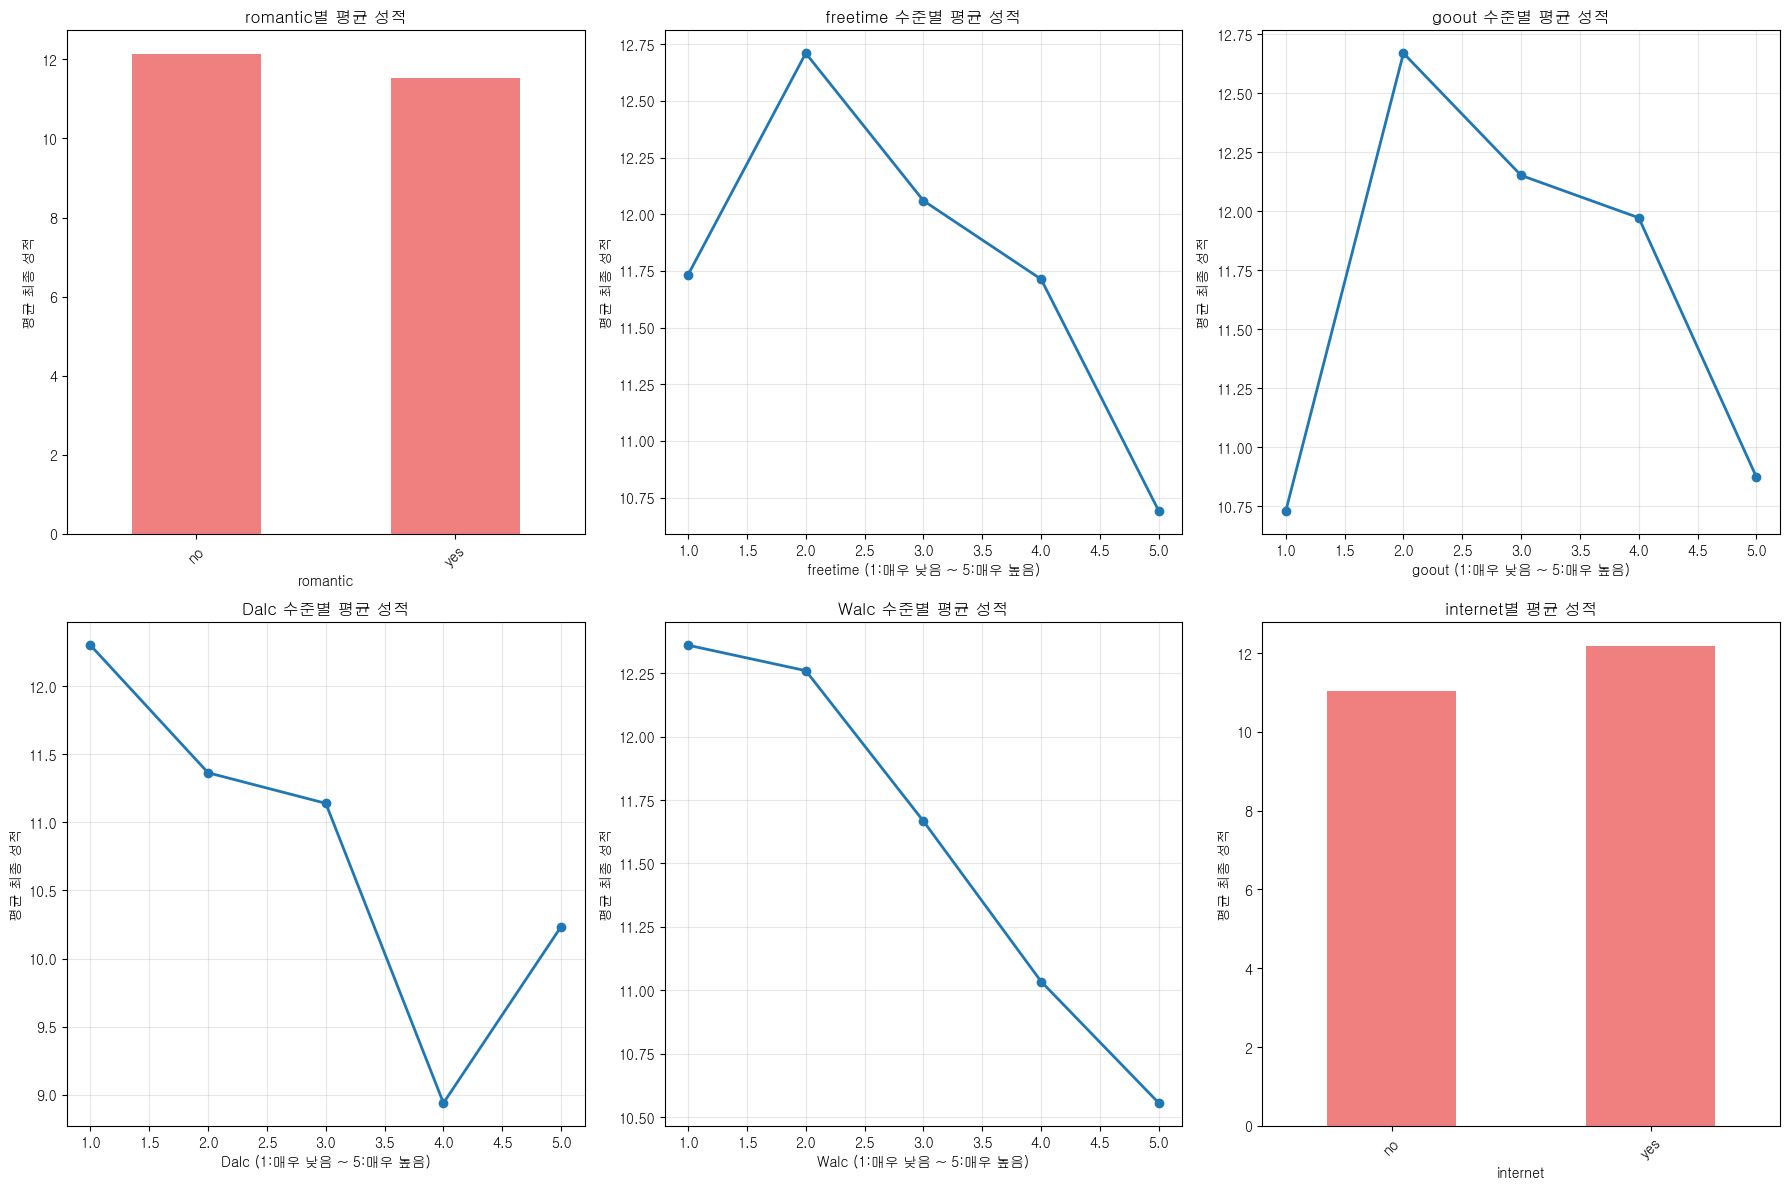


📊 라이프스타일 패턴 분석:
  • 연애 중인 학생 평균: 11.52점
  • 연애하지 않는 학생 평균: 12.13점
  • 저음주 그룹 평균: 12.37점
  • 고음주 그룹 평균: 10.71점
  • 인터넷 접근 효과: +1.15점
  • 균형잡힌 라이프스타일 학생들: 12.58점
  • 불균형 라이프스타일 학생들: 11.13점


In [47]:
# 사회 생활 및 라이프스타일 분석
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

social_factors = ['romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'internet']

for i, factor in enumerate(social_factors):
    if df[factor].dtype == 'object':  # 범주형 변수
        factor_stats = df.groupby(factor)['G3'].mean()
        factor_stats.plot(kind='bar', ax=axes[i], color='lightcoral')
        axes[i].set_title(f'{factor}별 평균 성적')
        axes[i].tick_params(axis='x', rotation=45)
    else:  # 수치형 변수
        factor_stats = df.groupby(factor)['G3'].mean()
        axes[i].plot(factor_stats.index, factor_stats.values, marker='o', linewidth=2)
        axes[i].set_title(f'{factor} 수준별 평균 성적')
        axes[i].set_xlabel(f'{factor} (1:매우 낮음 ~ 5:매우 높음)')
        axes[i].grid(True, alpha=0.3)
    
    axes[i].set_ylabel('평균 최종 성적')

plt.tight_layout()
plt.show()

# 생활 패턴 조합 분석
print(f"\n📊 라이프스타일 패턴 분석:")

# 연애와 성적
romantic_effect = df.groupby('romantic')['G3'].mean()
print(f"  • 연애 중인 학생 평균: {romantic_effect.get('yes', 0):.2f}점")
print(f"  • 연애하지 않는 학생 평균: {romantic_effect.get('no', 0):.2f}점")

# 음주와 성적
low_alcohol = df[(df['Dalc'] <= 2) & (df['Walc'] <= 2)]['G3'].mean()
high_alcohol = df[(df['Dalc'] >= 4) | (df['Walc'] >= 4)]['G3'].mean()
print(f"  • 저음주 그룹 평균: {low_alcohol:.2f}점")
print(f"  • 고음주 그룹 평균: {high_alcohol:.2f}점")

# 인터넷 접근과 성적
internet_effect = df.groupby('internet')['G3'].mean()
internet_gap = internet_effect.get('yes', 0) - internet_effect.get('no', 0)
print(f"  • 인터넷 접근 효과: +{internet_gap:.2f}점")

# 균형잡힌 라이프스타일
balanced_students = df[
    (df['freetime'].between(2, 4)) &  # 적당한 여가시간
    (df['goout'].between(2, 4)) &     # 적당한 외출
    (df['Dalc'] <= 2) &               # 낮은 평일 음주
    (df['Walc'] <= 3)                 # 낮은 주말 음주
]

balanced_score = balanced_students['G3'].mean()
unbalanced_score = df[~df.index.isin(balanced_students.index)]['G3'].mean()

print(f"  • 균형잡힌 라이프스타일 학생들: {balanced_score:.2f}점")
print(f"  • 불균형 라이프스타일 학생들: {unbalanced_score:.2f}점")

In [50]:
# 성공 요인 종합 분석

# 모든 요인들의 중요도 계산
factor_importance = {}

# 수치형 변수 상관관계
numeric_vars = df.select_dtypes(include=[np.number]).columns
numeric_vars = [col for col in numeric_vars if col not in ['G1', 'G2', 'G3']]

correlations = df[numeric_vars + ['G3']].corr()['G3'].abs().sort_values(ascending=False)

for var, corr in correlations.items():
    if var != 'G3':
        factor_importance[var] = ('상관관계', corr)

# 범주형 변수 영향 (평균 차이)
categorical_vars = df.select_dtypes(include=['object']).columns

for var in categorical_vars:
    try:
        groups = [group['G3'].values for name, group in df.groupby(var)]
        if len(groups) >= 2:
            group_means = df.groupby(var)['G3'].mean()
            max_diff = group_means.max() - group_means.min()
            # 표준화 (0-1 범위로)
            normalized_diff = max_diff / 20  # 최대 점수가 20점이므로
            factor_importance[var] = ('평균차이', normalized_diff)
    except:
        continue

# 중요도 순위
sorted_factors = sorted(factor_importance.items(), key=lambda x: x[1][1], reverse=True)

print(f"\n🏆 성과 향상 요인 중요도 순위 (TOP 15):")
for i, (factor, (method, importance)) in enumerate(sorted_factors[:15], 1):
    impact = "매우 높음" if importance > 0.4 else "높음" if importance > 0.25 else "중간" if importance > 0.15 else "낮음"
    print(f"  {i:2d}. {factor:<15}: {importance:.3f} ({impact})")


# 성공 프로파일 생성
top_performers = df[df['G3'] >= 16]  # 상위 20% 기준

print(f"\n⭐ 우수 학생들의 공통 특징 (16점 이상, {len(top_performers)}명):")

# 범주형 변수에서 우수 학생들이 많은 카테고리
for var in ['famsup', 'schoolsup', 'paid', 'internet', 'activities', 'higher']:
    if var in df.columns:
        top_distribution = top_performers[var].value_counts(normalize=True)
        if len(top_distribution) > 0:
            most_common = top_distribution.index[0]
            percentage = top_distribution.iloc[0] * 100
            print(f"  • {var}: {most_common} ({percentage:.1f}%)")

# 수치형 변수 평균 비교
print(f"\n📊 우수 학생 vs 전체 평균 비교:")
key_numeric = ['studytime', 'absences', 'Medu', 'Fedu', 'famrel', 'health']
for var in key_numeric:
    if var in df.columns:
        top_avg = top_performers[var].mean()
        overall_avg = df[var].mean()
        diff_pct = (top_avg - overall_avg) / overall_avg * 100
        print(f"  • {var}: {top_avg:.2f} vs {overall_avg:.2f} (차이: {diff_pct:+.1f}%)")

# 실패 위험 요인 분석
low_performers = df[df['G3'] < 10]  # 실패 그룹

print(f"\n⚠️  실패 위험 요인 (10점 미만, {len(low_performers)}명):")

risk_factors = {}
for var in ['failures', 'absences', 'Dalc', 'Walc', 'freetime', 'goout']:
    if var in df.columns:
        low_avg = low_performers[var].mean()
        overall_avg = df[var].mean()
        if low_avg > overall_avg:  # 위험 요인은 평균보다 높은 경우
            risk_level = (low_avg - overall_avg) / overall_avg * 100
            risk_factors[var] = risk_level
            print(f"  • {var}: {low_avg:.2f} vs {overall_avg:.2f} (+{risk_level:.1f}%)")
         
    


🏆 성과 향상 요인 중요도 순위 (TOP 15):
   1. success        : 0.663 (매우 높음)
   2. failures       : 0.393 (높음)
   3. studytime      : 0.250 (중간)
   4. parent_edu_combined: 0.249 (중간)
   5. Medu           : 0.240 (중간)
   6. Fedu           : 0.212 (중간)
   7. Dalc           : 0.205 (중간)
   8. Walc           : 0.177 (중간)
   9. higher         : 0.174 (중간)
  10. traveltime     : 0.127 (낮음)
  11. freetime       : 0.123 (낮음)
  12. reason         : 0.112 (낮음)
  13. Fjob           : 0.108 (낮음)
  14. age            : 0.107 (낮음)
  15. Mjob           : 0.105 (낮음)

⭐ 우수 학생들의 공통 특징 (16점 이상, 82명):
  • famsup: yes (64.6%)
  • schoolsup: no (97.6%)
  • paid: no (97.6%)
  • internet: yes (85.4%)
  • activities: yes (52.4%)
  • higher: yes (100.0%)

📊 우수 학생 vs 전체 평균 비교:
  • studytime: 2.24 vs 1.93 (차이: +16.2%)
  • absences: 2.59 vs 3.66 (차이: -29.4%)
  • Medu: 3.10 vs 2.51 (차이: +23.2%)
  • Fedu: 2.66 vs 2.31 (차이: +15.3%)
  • famrel: 4.05 vs 3.93 (차이: +3.0%)
  • health: 3.34 vs 3.54 (차이: -5.5%)

⚠️  실패 위험 요인 (10점 미만, 